<a href="https://colab.research.google.com/github/43pratik/ML_lab/blob/main/Prac_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/customer_purchase_data.csv')
print(df)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5

In [ ]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
 #Define features and target variable
X = df.drop(columns=["PurchaseStatus"])
y = df["PurchaseStatus"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       172
           1       0.82      0.77      0.80       128

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300

Confusion Matrix:
[[150  22]
 [ 29  99]]


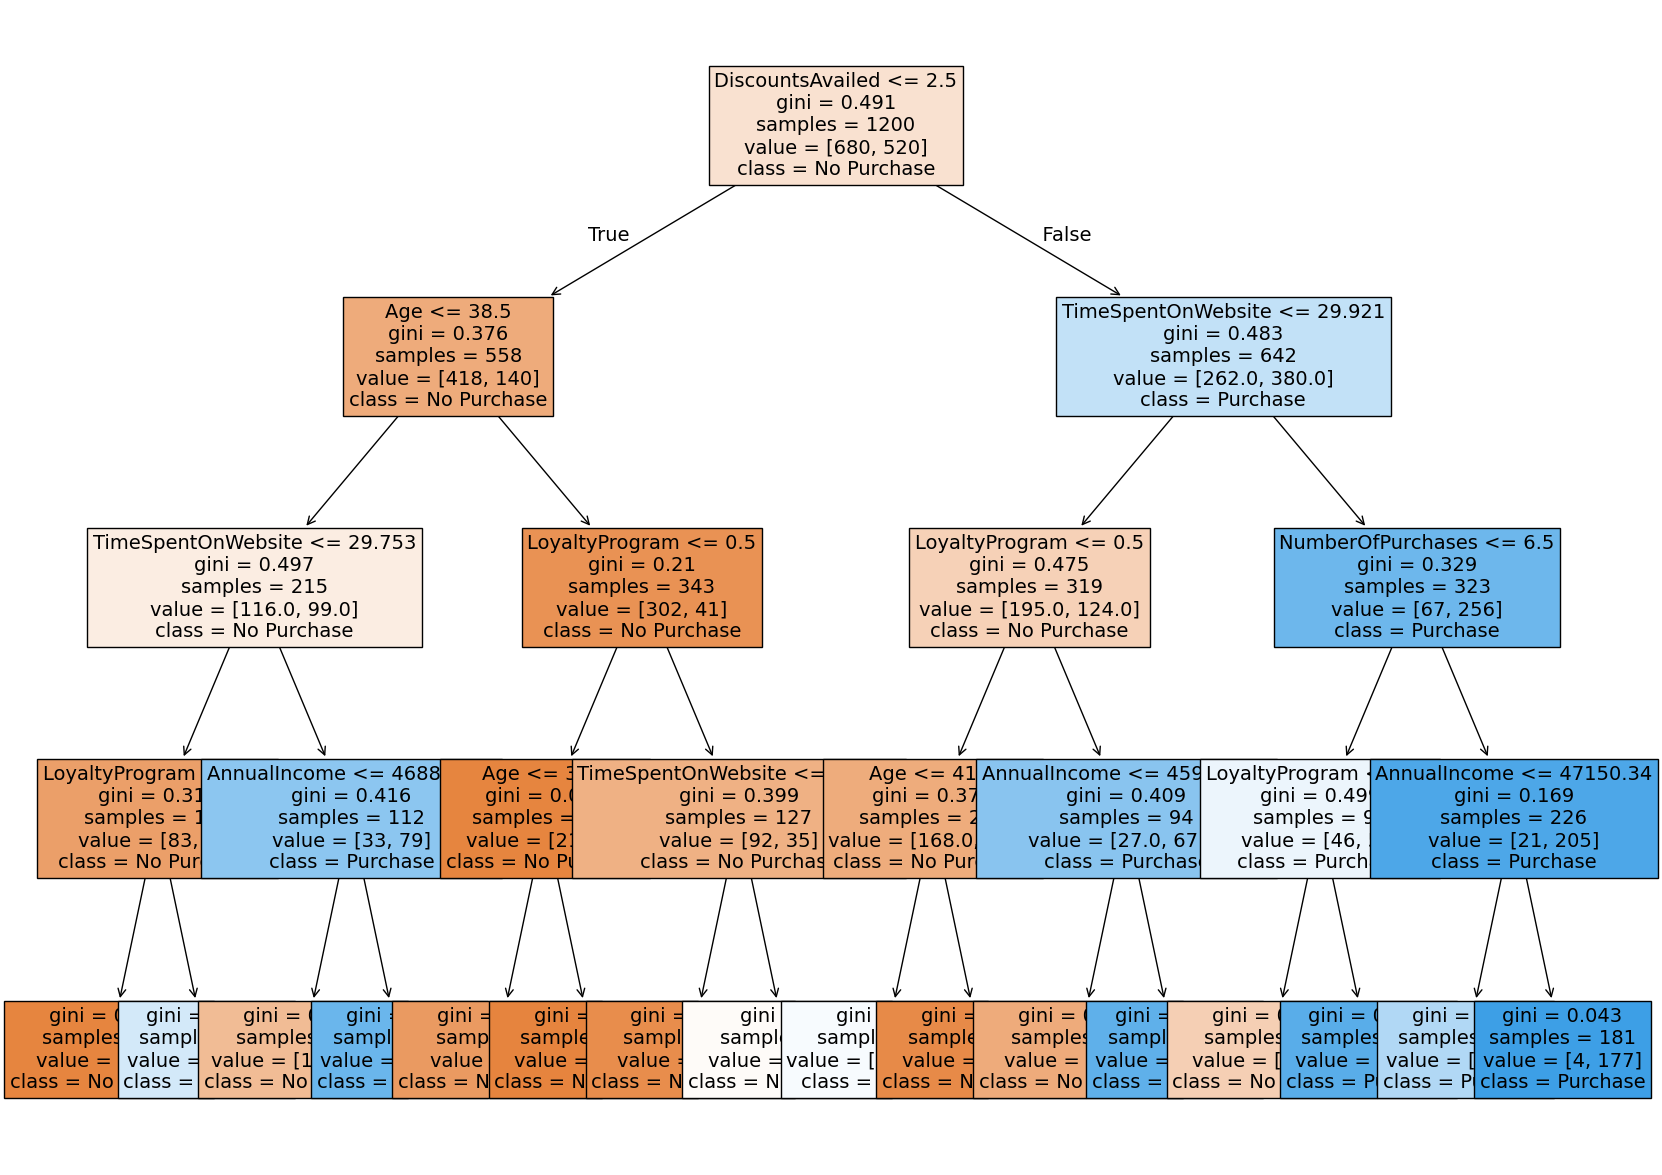

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 15))  # Increase figure size (width, height)
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=["No Purchase", "Purchase"],
          filled=True,
          fontsize=14)  # Increase font size
plt.show()

In [3]:
#Bonus Assignment
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/winequality-red.csv")

In [5]:
#Check and handle missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
#Feature Scaling
X = data.drop('quality', axis=1)
y = data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#split the datset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42,max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

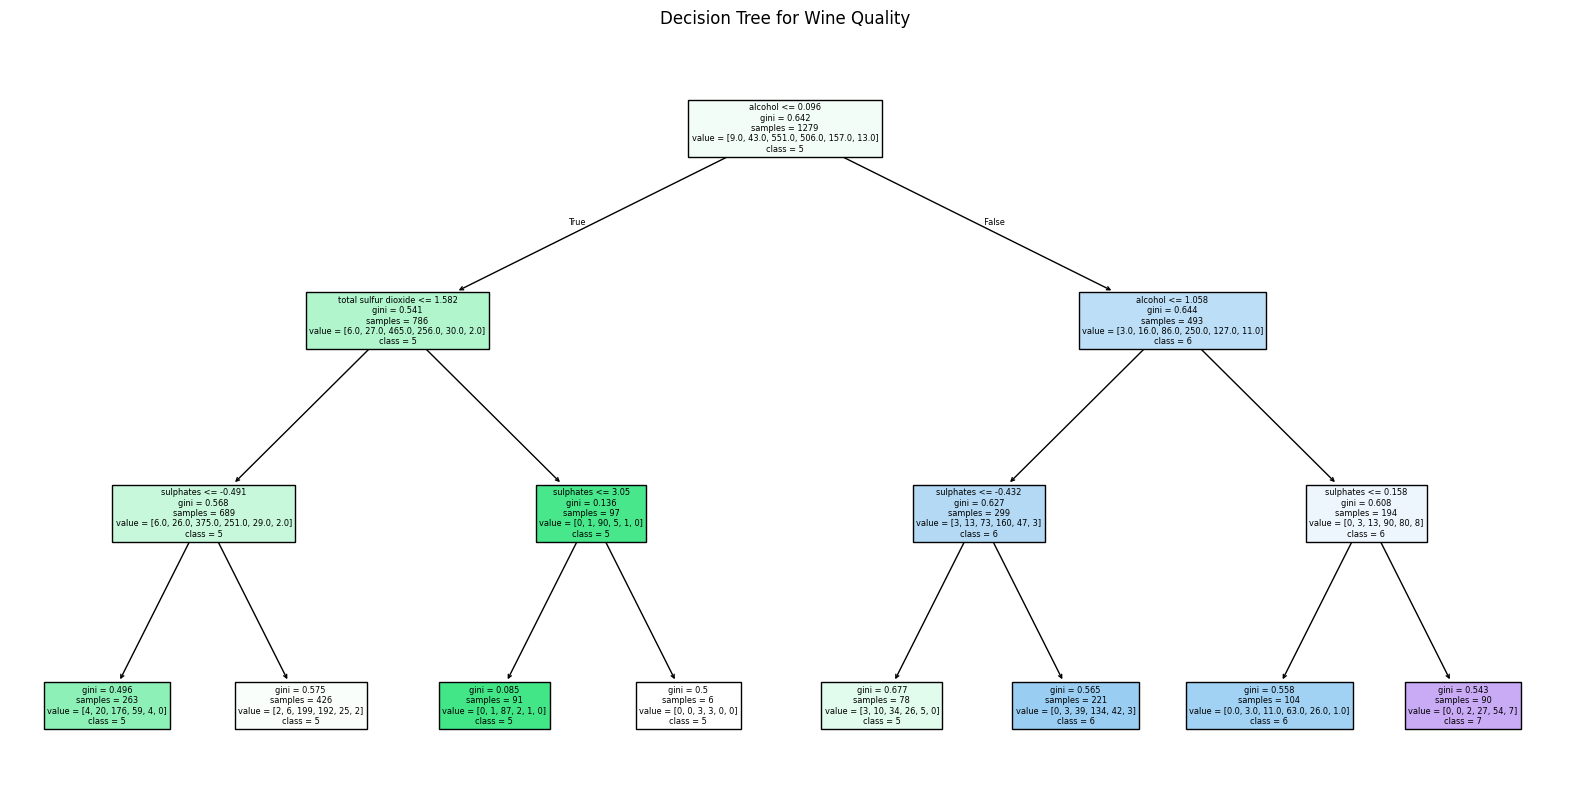

In [11]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title("Decision Tree for Wine Quality")
plt.show()

In [12]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.528125

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.54      0.91      0.68       130
           6       0.53      0.31      0.39       132
           7       0.42      0.24      0.30        42
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.25      0.24      0.23       320
weighted avg       0.49      0.53      0.48       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Hyperparameter Tuning
params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [14]:
# Best model after tuning
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned Model Report:\n", classification_report(y_test, y_pred_best))

Tuned Model Accuracy: 0.578125

Tuned Model Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.72      0.67       130
           6       0.57      0.55      0.56       132
           7       0.48      0.48      0.48        42
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.28      0.29      0.28       320
weighted avg       0.56      0.58      0.57       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
